# 06/05 - Pair Programming EDA 3 - Lidia y Tatiana

**Hipótesis**

Antes de seguir, recordamos las preguntas que nos planteamos al principio del pair programming de EDA para dirigir nuestro análisis.

- ¿Es Australia es el sitio más peligroso y letal para estar relajada en la playa?
- ¿Hay diferencias entre los paises en los ataques a hombres y mujeres?
- ¿Cuáles son las edades que más sufren ataques?
- Independientemente de la edad, sufren los hombres más ataques que las mujeres?
- ¿En qué mes ocurren más ataques?
- ¿Cuál es la relación entre la especie y el tipo de ataque (si es fatal o no)?
- ¿Cómo han evolucionado los ataques a lo largo del tiempo?

# EJERCICIO 1

Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sidetable
import warnings

In [ ]:
df = pd.read_csv("./attackito_supremo.csv", index_col=0)
df.head(2)

In [3]:
plt.rcParams["figure.figsize"] = (10,8)
warnings.filterwarnings('ignore')

# EJERCICIO 2

- **¿Cuántos ataques hubo por pais?**

In [ ]:
frecuencia_ataques= df["country"].value_counts()
frecuencia_ataques

- **¿Se puede ver algo claro si ploteamos todos los paises?**

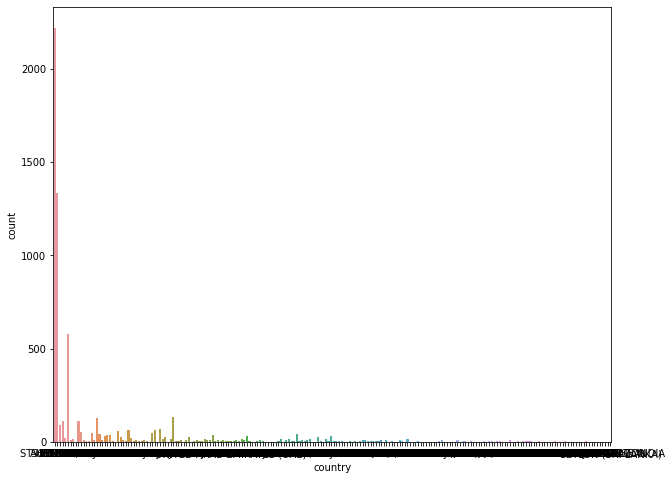

In [5]:
#Ploteamos todos los paises para ver el resultado, demasiados paises para ver una distribución clara.
ax = sns.countplot(x="country", data=df)

- **En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.**

In [6]:
frecuencia_ataques_10_paises = df.stb.freq(['country'])[:10]
frecuencia_ataques_10_paises


,country,count,percent,cumulative_count,cumulative_percent
0,USA,2222,35.643247,2222,35.643247
1,AUSTRALIA,1335,21.414822,3557,57.058069
2,SOUTH AFRICA,577,9.255695,4134,66.313763
3,PAPUA NEW GUINEA,134,2.149503,4268,68.463266
4,NEW ZEALAND,127,2.037215,4395,70.500481
5,BRAZIL,112,1.796599,4507,72.297081
6,BAHAMAS,109,1.748476,4616,74.045557
7,MEXICO,88,1.411614,4704,75.457170
8,ITALY,70,1.122875,4774,76.580045
9,FIJI,62,0.994546,4836,77.574591


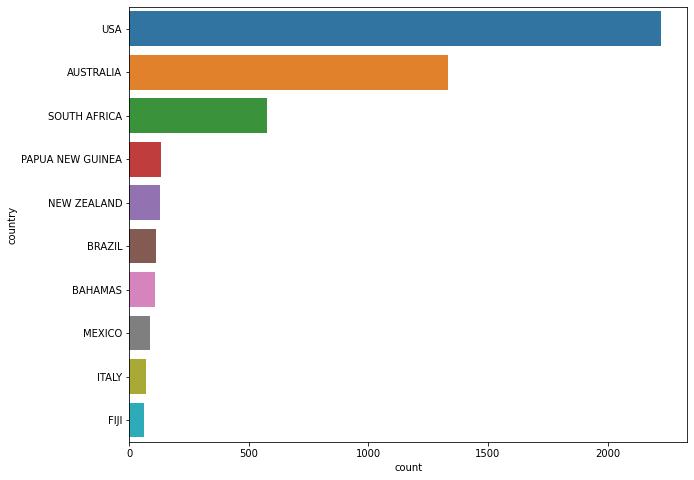

In [7]:
ax = sns.barplot(x="count", y="country", data=frecuencia_ataques_10_paises)


    Countinuamos con nuestro DF pero solo incluimos los 10 paises donde más número de ataques han ocurrido.

In [8]:
frecuentes= df["country"].value_counts()[0:10]
frecuentes

USA                 2222
AUSTRALIA           1335
SOUTH AFRICA         577
PAPUA NEW GUINEA     134
NEW ZEALAND          127
BRAZIL               112
BAHAMAS              109
MEXICO                88
ITALY                 70
FIJI                  62
Name: country, dtype: int64

    Para limitar nuestro DF a la valoración anterior con los 10 paises donde han ocurrido más ataques, podemos realizarlo de 2 formas, con LISTAS o DICCIONARIO.
    #Finalmente ejecutamos con diccionario.
    #Pero dejamos el ejemplo como sería con listas.

In [52]:
    # Ejemplo lista

values = frecuentes.keys().to_list()
df= df[df["country"].isin(['USA', 'AUSTRALIA', 'SOUTH AFRICA', 'PAPUA NEW GUINEA', 'NEW ZEALAND', 'BRAZIL', 'BAHAMAS', 'MEXICO', 'ITALY', 'FIJI'])]

In [10]:
    # Con diccionario, podemos usar las variables en .isin() 

dict_frecuentes =dict(zip(frecuentes.keys(),frecuentes))
dict_frecuentes.keys()

dict_keys(['USA', 'AUSTRALIA', 'SOUTH AFRICA', 'PAPUA NEW GUINEA', 'NEW ZEALAND', 'BRAZIL', 'BAHAMAS', 'MEXICO', 'ITALY', 'FIJI'])

In [ ]:
df= df[df["country"].isin(dict_frecuentes.keys())]

In [72]:
df_country10= df.copy()

In [73]:
df_country10["country"].unique() 

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'SOUTH AFRICA', 'BAHAMAS',
       'NEW ZEALAND', 'FIJI', 'ITALY', 'PAPUA NEW GUINEA'], dtype=object)

In [56]:
#Obtenemos la frecuencia de los ataque en nuetro DF para obtener el recuento de ataques 
frecuencia_country_10= df.stb.freq(['country'])

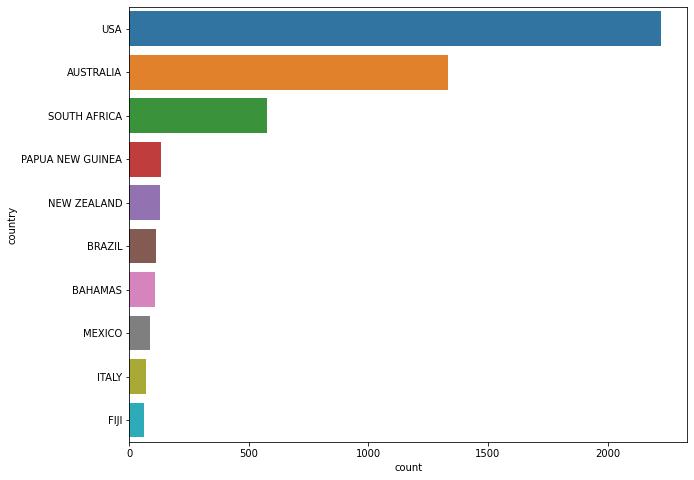

In [57]:
ax = sns.barplot(x="count", y="country", data=frecuencia_country_10)

    Dando respuesta a nuestra hipotesis, acerca de si es Australia el país más peligroso y letal. Concluimos que en cuanto a número de ataques la hipotesis es falsa. El país con más número de ataques es USA y el segundo es Australia. Además la diferencia es significativa, para el año 2018 USA registró 2.222 ataques, mientras Australia registró 1.335.   


- Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?

In [74]:
#Sobre los 10 paises con más ataques 
#Vamos a centrarnos en las categorias "M" y "F"

df_country10= df_country10[df_country10["sex_"].isin(["M", "F"])]

In [75]:
df_country10["sex_"].unique()

array(['F', 'M'], dtype=object)

In [ ]:
#Este es otro modelo que podemos utilizar con .groupby
#Es modelo no es el que vamos a usar, pero es una de las opciones que hemos pensado y lo dejamos aqui a modo de ejemplo nº2
ataque_sexo_groupby = pd.DataFrame(df_country10.groupby(["country","sex_"])["case_number"].count().sort_values(ascending= False)).reset_index()
ataque_sexo_groupby

In [ ]:
# Si examinamos la diferencia de sexos entre los paises de nuestro DF
ataque_por_sexo=df_country10.stb.freq(['sex_', 'country'],cum_cols=False)
ataque_por_sexo

Text(0.5, 1.0, 'Número de ataques por país y sexo')

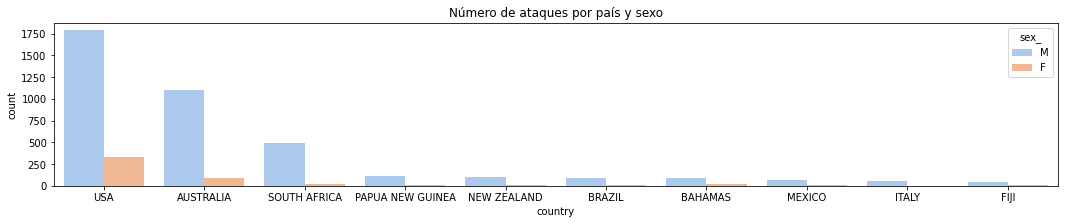

In [21]:
fig, ax = plt.subplots(figsize = (18, 3))
ax = sns.barplot(x="country", y="count", hue= "sex_", data=ataque_por_sexo, palette='pastel')
ax.set_title('Número de ataques por país y sexo')

    Existe diferencia entre los ataques por sexo en los 10 países seleccionados, siendo los Hombres quienes recibieron más ataques en cada uno de estos países.

-----

- **¿Qué edad recibe mayor número de ataques?**

**💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. Para hacer esto de una forma sencilla tenemos el método pd.cut() que aprendimos en la lección de Limpieza II.**

In [76]:
#Comprobamos el tipo, y vemos que es object, debemos cambiar el tipo pero antes hay que examinar los valores y decidir que hacer con ellos
df_country10["age"].dtype

dtype('O')

In [77]:
#Siguen siendo demasiados datos que no nos reportan información concreta para trabajar.
df_country10["age"].unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '34',
       '60', '33', '29', '41', '37', '56', '19', '25', '69', '38', '55',
       '35', '46', '14', '28', '20', '54', '7', '31', '17', '40', '3',
       '13', '8', '50', '16', '73', '20s', '68', '21', '51', '39', '58',
       '30', '26', '22', 'Teen', '47', '61', '65', '42', '36', '66', '43',
       '60s', '9', '49', '59', '6', '27', '64', '23', '45', '71', '44',
       '62', '63', '70', '24', '40s', '53', '50s', 'teen', '77', '74',
       '30s', '5', '86', '12 or 13', 'Teens', '8 or 10', '84', '\xa0 ',
       '30 or 36', '6½', '75', '33 or 37', 'mid-30s', '23 & 20', ' 30',
       '7      &    31', ' 28', '20?', "60's", '16 to 18', '87', '67',
       'Elderly', 'mid-20s', 'Ca. 33', ' ', '74 ', '45 ', '21 or 26',
       '>50', 'adult', '? & 19', '9 months', '(adult)', '33 & 37',
       '25 or 28', '37, 67, 35, 27,  ? & 27', '30 & 32', '17 & 35',
       '"middle-age"', '34 & 19', ' 43', '"young"', '78', 'F', 'Both 11',

In [78]:
#Hemos eliminado los NAN que no nos daban información
df_country10["age"].dropna()

0          57
1          11
2          48
6          18
7          52
        ...  
6125    young
6171       15
6182       21
6208       19
6220       27
Name: age, Length: 2882, dtype: object

In [79]:
df_country10['age'] = df['age'].astype(str)

In [80]:
#Hemos usado regex para dejar solo los números
import re
patron = "[0-9]{1,2}"
def limpio (col):
    x= re.findall(patron, col)
    if len(x)>0:
        return x[0]
    else:
        return "0"


In [81]:
df_country10["age"]= df_country10["age"].apply(limpio)

In [82]:
df_country10["age"].unique()

array(['57', '11', '48', '0', '18', '52', '15', '12', '32', '10', '34',
       '60', '33', '29', '41', '37', '56', '19', '25', '69', '38', '55',
       '35', '46', '14', '28', '20', '54', '7', '31', '17', '40', '3',
       '13', '8', '50', '16', '73', '68', '21', '51', '39', '58', '30',
       '26', '22', '47', '61', '65', '42', '36', '66', '43', '9', '49',
       '59', '6', '27', '64', '23', '45', '71', '44', '62', '63', '70',
       '24', '53', '77', '74', '5', '86', '84', '75', '87', '67', '78',
       '2'], dtype=object)

In [83]:
df_country10['age'] = df_country10['age'].astype(int)

In [84]:
df_country10['age'].dtype

dtype('int64')

    Podríamos sustituir los valores "0" por la media de los datos, para que aportarsen algún valor , más real que 0

In [91]:
#Es la media de edad
media= df_country10[df_country10["age"]>0]["age"].mean()
media= round(media)
media


27

In [97]:
df_country10["age"].replace({0: media}, inplace= True)

In [98]:
df_country10.age.unique()

array([57, 11, 48, 27, 18, 52, 15, 12, 32, 10, 34, 60, 33, 29, 41, 37, 56,
       19, 25, 69, 38, 55, 35, 46, 14, 28, 20, 54,  7, 31, 17, 40,  3, 13,
        8, 50, 16, 73, 68, 21, 51, 39, 58, 30, 26, 22, 47, 61, 65, 42, 36,
       66, 43,  9, 49, 59,  6, 64, 23, 45, 71, 44, 62, 63, 70, 24, 53, 77,
       74,  5, 86, 84, 75, 87, 67, 78,  2])

In [ ]:
ataques_edades= pd.DataFrame(df_country10.groupby(["age","country","sex_"])["case_number"].count().sort_values(ascending= False)).reset_index()
ataques_edades

In [ ]:
#Establecemos los rangos de edades y les ponemos label para que salga mejor en la gráfica.
ataques_edades["age_bins"] = pd.cut(ataques_edades["age"],bins=[1,10,20,30,40,50,60,70,80,90],labels=['1 a 10', '11 a 20', '21 a 30','31 a 40', '41 a 50',"51 a 60", "61 a 70", "70 a 80", "81 a 90"],right=True)
ataques_edades.value_counts()

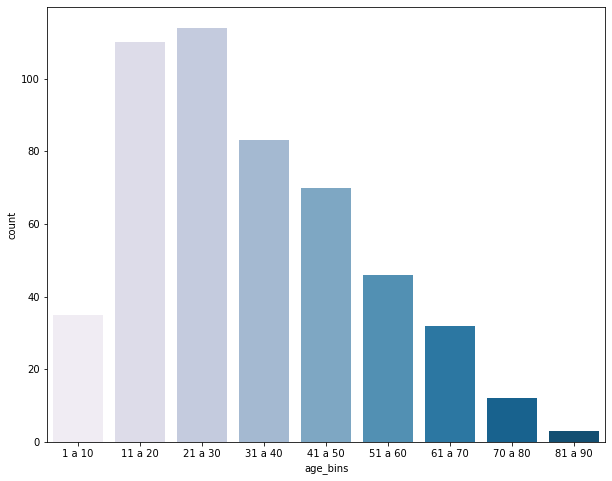

In [109]:
ax = sns.countplot(x="age_bins",data=ataques_edades, palette='PuBu')

    La edad que recibe el mayor número de ataques es el rango de 21 a 30 años. 

Ataques entre sexos, ¿hay diferencia?

In [ ]:
df_sex= df[df["sex_"].isin(["M", "F"])]

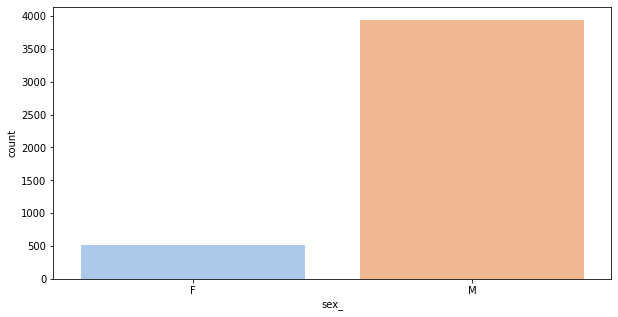

In [145]:
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.countplot(x="sex_", data=df_sex, palette='pastel')

    Existe una diferencia significativa entre los ataques recibidos por hombres y mujeres. 3.942 ataques fueron a hombres y 509 ataques fueron a mujeres.

¿Cuando ocurren más ataques? ¿Os sale algo raro en la gráfica? Intentad limpiar un poco los datos para que os salga mejor.

In [136]:
patron = r"(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)"

In [137]:
def sacar_mes(col):
    x= re.findall(patron, col)
    try:
        return x[0]
    except:
        return "unspecified"
        

In [138]:
df["date"]= df["date"].apply(sacar_mes)

In [139]:
df.date.unique()

array(['Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan', 'Dec', 'Nov', 'Oct',
       'Sep', 'Aug', 'Jul', 'unspecified'], dtype=object)

In [140]:
#creamos una variable, que luego usaremos para indicar el orden de visualización de la gráfica
orden_meses= "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "unspecified" 

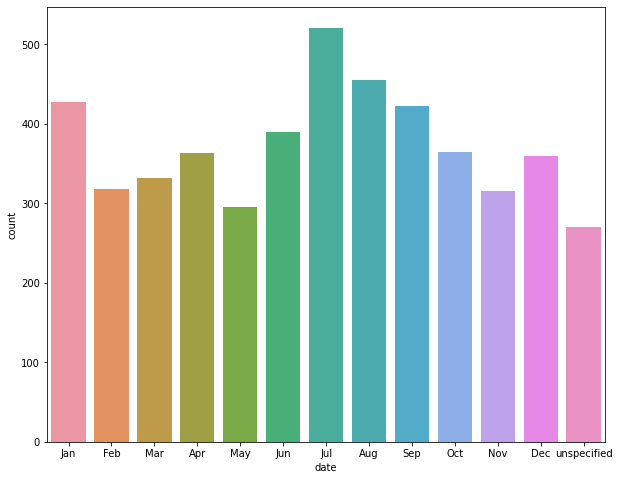

In [141]:
ax = sns.countplot(x="date", data=df, order= orden_meses) 

    Julio es el mes del año en que ocurren más ataques de tiburones. 

👱​🦈​🚨 DANGER ! si eres hombre, entre 21 y 30 años, estas ed vacaciones en USA en julio ... tienes una alta probabilidad de ser atacado por un tiburon. 